# K-Means Clustering using Scikit-Learn

#### Python Imports

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [33]:
%matplotlib inline
plt.style.use('seaborn')

#### Python Function to Plot the data points

In [34]:
def kmeans_visual(s):
    b_x = [45, 50, 55]
    b_y = [55, 60, 50]
    r_x = [70, 75, 80]
    r_y = [70, 65, 75]
    plt.xlabel('Math')
    plt.ylabel('Logic')
    plt.xlim(30, 100)
    plt.ylim(30, 100)
    if s == 1:
        col1 = 'black'
        col2 = 'black'
    else:
        col1 = 'dodgerblue'
        col2 = 'salmon'
    plt.scatter(b_x, b_y, color=col1)
    plt.scatter(r_x, r_y, color=col2)
    plt.show()

#### K-Means Illustration Plots

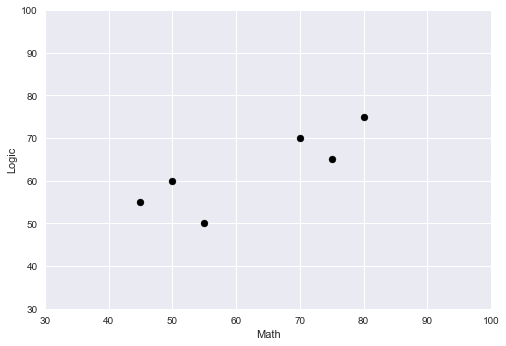

In [35]:
kmeans_visual(1)

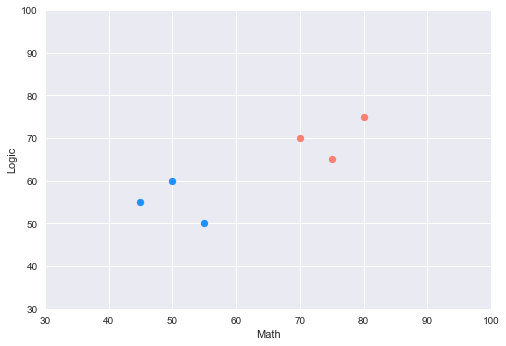

In [36]:
kmeans_visual(2)

#### Load and Display the Palmer Penguins Data Set
Source: [Palmer Penguins Data Set](https://vincentarelbundock.github.io/Rdatasets/csv/palmerpenguins/penguins.csv)

**Attribute**

1. species: denotes the penguin species (Adelie, Chinstrap, and Gentoo)
2. island: denotes the island in Palmer Archipelago, Antarctica (Biscoe, Dream, or Torgersen)
3. bill_length_mm: denotes the penguins beak length (millimeters)
4. bill_depth_mm: denotes the penguins beak depth (millimeters)
5. flipper_length_mm: denotes the penguins flipper length (millimeters)
6. body_mass_g: denotes the penguins body mass (grams)
7. sex: denotes the penguins sex (female, male)
8. year: denotes the study year (2007, 2008, or 2009)

In [37]:
url = 'https://vincentarelbundock.github.io/Rdatasets/csv/palmerpenguins/penguins.csv'
penguins_df = pd.read_csv(url)
penguins_df = penguins_df.drop(penguins_df.columns[0], axis=1)
penguins_df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


#### Address all the missing values

- Given that mot of the columns are missing for the rows at index 3 and 271, it is better to drop them
- Comparing the mean values of the features (`bill_length_mm`, `bill_depth_mm`, `flipper_length_mm`, and `body_mass_g`) with the ones in the rows at index 8, 10, 11, we can infer the value for `sex` to be **female**. Similarly, the value of `sex` for the row at index 9 is **male**
- Comparing the mean values of the features (`bill_length_mm`, `bill_depth_mm`, `flipper_length_mm`, and `body_mass_g`) with the ones in the row at index 47, we can infer the value for `sex` to be **female**
- Comparing the mean values of the features (`bill_length_mm`, `bill_depth_mm`, `flipper_length_mm`, and `body_mass_g`) with the ones in the rows at index 178, 218, 256, 268, we can infer the value for `sex` to be **female**

In [38]:
penguins_df = penguins_df.drop([3, 271], axis=0)
penguins_df.loc[[8, 10, 11], 'sex'] = 'female'
penguins_df.at[9, 'sex'] = 'male'
penguins_df.at[47, 'sex'] = 'female'
penguins_df.loc[[178, 218, 256, 268], 'sex'] = 'female'

#### Display feature information about the Palmer Penguins data set after the fixes

In [39]:
penguins_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 342 entries, 0 to 343
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            342 non-null    object 
 1   island             342 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                342 non-null    object 
 7   year               342 non-null    int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 32.1+ KB


#### Drop the target variable `species` from the data set

In [40]:
penguins_df = penguins_df.drop('species', axis=1)

#### Encode the categorical features `island` and `sex`

In [41]:
nom_features = ['island', 'sex']
nom_encoded_df = pd.get_dummies(penguins_df[nom_features], prefix_sep='.', drop_first=True, sparse=False)
nom_encoded_df

,island.Dream,island.Torgersen,sex.male
0,0,1,1
1,0,1,0
2,0,1,0
4,0,1,0
5,0,1,1
...,...,...,...
339,1,0,1
340,1,0,0
341,1,0,1
342,1,0,1


#### Replace categorical features with encoded features

In [42]:
penguins_df = penguins_df.drop(penguins_df[nom_features], axis=1)
penguins_df = pd.concat([penguins_df, nom_encoded_df], axis=1)
penguins_df

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year,island.Dream,island.Torgersen,sex.male
0,39.1,18.7,181.0,3750.0,2007,0,1,1
1,39.5,17.4,186.0,3800.0,2007,0,1,0
2,40.3,18.0,195.0,3250.0,2007,0,1,0
4,36.7,19.3,193.0,3450.0,2007,0,1,0
5,39.3,20.6,190.0,3650.0,2007,0,1,1
...,...,...,...,...,...,...,...,...
339,55.8,19.8,207.0,4000.0,2009,1,0,1
340,43.5,18.1,202.0,3400.0,2009,1,0,0
341,49.6,18.2,193.0,3775.0,2009,1,0,1
342,50.8,19.0,210.0,4100.0,2009,1,0,1


#### Initialize and fit the K-Means model

The hyperparameter `n_clusters` indicates the number of clusters
The hyperparameter `init` indicates how to select the initial cluster centroids
The hyperparameter `max_iter` indicates maximum number of iterations to perform

In [43]:
model = KMeans(n_clusters=3, init='random', max_iter=100, random_state=101)
model.fit(penguins_df)

KMeans(init='random', max_iter=100, n_clusters=3, random_state=101)

#### Plot the Clusters identified by the K-Means model

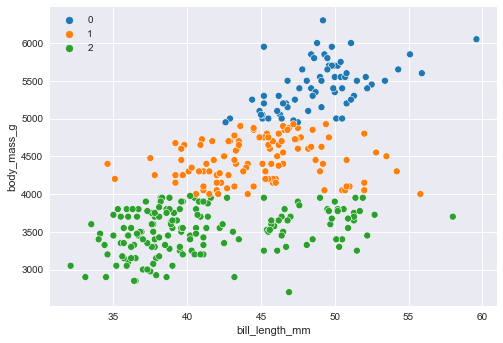

In [45]:
sns.scatterplot(x=penguins_df['bill_length_mm'], y=penguins_df['body_mass_g'], hue=model.labels_, palette='tab10')
plt.show()

#### Compute the Distortion for each Cluster Size

In [46]:
distortions = []
for k in range(1, 11):
    km = KMeans(n_clusters=k, init='random', max_iter=100, random_state=101)
    km.fit(penguins_df)
    distortions.append(km.inertia_)

#### Plot the Cluster Size vs Distortion Graph

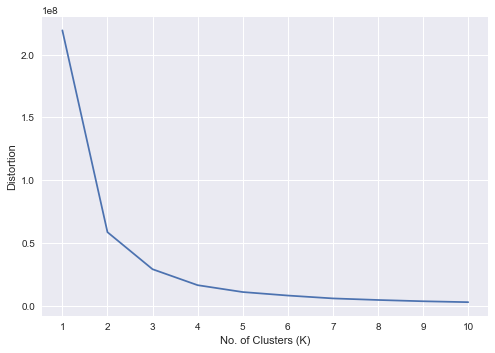

In [49]:
plt.plot(range(1, 11), distortions)
plt.xlabel('No. of Clusters (K)')
plt.xticks(range(1, 11, 1))
plt.ylabel('Distortion')
plt.show()